<a href="https://colab.research.google.com/github/Boon-Yang/Machine-Learning-for-Defect-Detection-In-Additive-Manufacturing/blob/master/VAE_Training_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Notebook to G. Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import scipy.io as io
import os 
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import h5py
import seaborn as sns
!ls

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


drive  sample_data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%tensorflow_version 1.x
import tensorflow as tf
import tensorflow.keras.backend as K

from keras.layers import Input, Flatten, Reshape, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

import os

# os.chdir('MPImages')

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
from keras.layers import BatchNormalization, Lambda

In [ ]:
from keras.optimizers import RMSprop

In [ ]:
from keras.optimizers import SGD
from tensorflow import set_random_seed
from keras.losses import mean_absolute_error

https://www.machinecurve.com/index.php/2019/12/30/how-to-create-a-variational-autoencoder-with-keras/#creating-a-vae-with-keras

In [ ]:
from keras.optimizers import SGD
from tensorflow import set_random_seed
from keras.losses import mean_absolute_error

In [ ]:
def min_max_norm(meltpool_img):
  return (meltpool_img - np.min(meltpool_img))/np.ptp(meltpool_img)

In [ ]:
from keras.losses import binary_crossentropy
def kl_reconstruction_loss(true, pred):
  # Reconstruction loss
  reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred))*img_width*img_height
  # KL divergence loss
  kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
  kl_loss = K.sum(kl_loss, axis=-1)
  kl_loss *= -0.5
  # Total loss = 50% rec + 50% KL divergence loss
  return K.mean(reconstruction_loss + kl_loss)

# Cropping img

In [ ]:
def show_images(imageIDs, data):
  if len(imageIDs) <= 20:
    fig, axes = plt.subplots(figsize=(20, 15), nrows = 4, ncols = int(np.ceil((len(imageIDs)/4))))
  else:
    fig, axes = plt.subplots(figsize=(30, 25), nrows = int(np.ceil((len(imageIDs)/4))), ncols = 4)
  plt.tight_layout()
  axes = axes.flatten()
  
  list(map(lambda x: x.set_axis_off(), axes))

  for idx, imageID in enumerate(imageIDs):
    ax=axes[idx]
    imageArray = data[imageID]
    ax.imshow(imageArray, cmap='inferno')
    ax.set_title(imageID)
  return axes

In [ ]:
data_path = '/content/drive/My Drive/FYP MAT Data/Build 3 Test 1/'
os.chdir(data_path)
layers_available = os.listdir()

In [ ]:
layers_available

['L412',
 'L386',
 'L330',
 'L311',
 'L291',
 'L257',
 'L219',
 'L184',
 'L146',
 'L128',
 'L102']

L184

['#refs#', '#subsystem#', 'cam1aligned', 'cam2aligned', 'end_frame', 'frame_time', 'is_frame_range_clipped', 'positionimgs', 'power', 'stats', 'temperatureimgs', 'x_true_pos', 'y_true_pos']


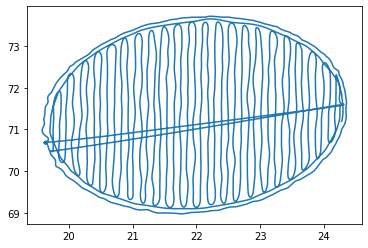

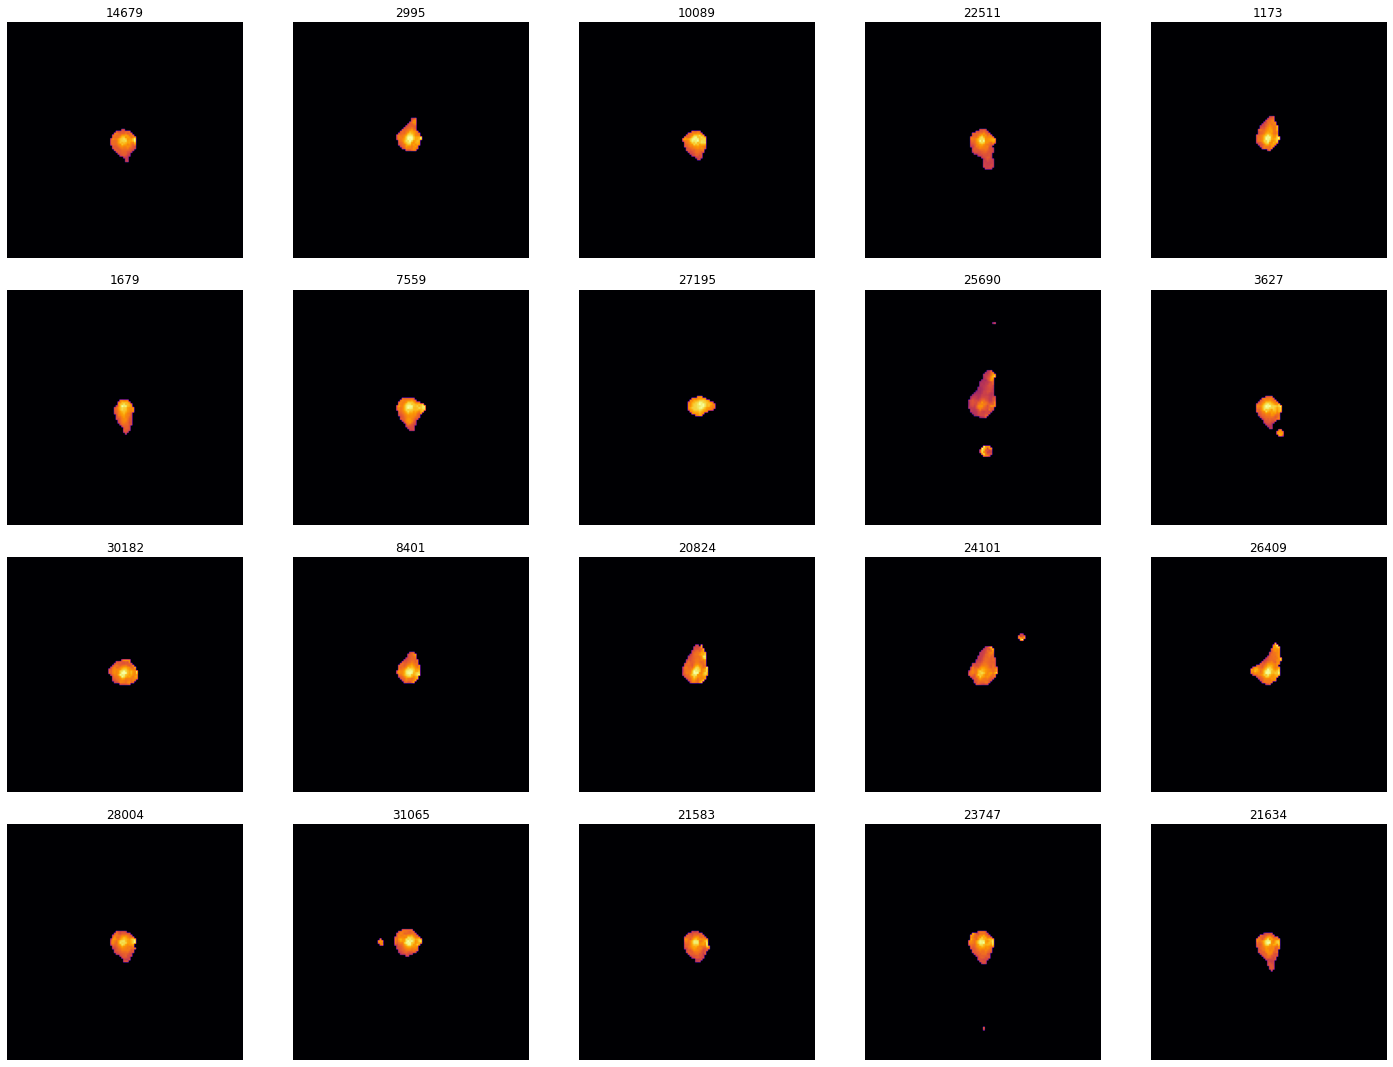


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
L219

['#refs#', '#subsystem#', 'cam1aligned', 'cam2aligned', 'end_frame', 'frame_time', 'is_frame_range_clipped', 'positionimgs', 'power', 'stats', 'temperatureimgs', 'x_true_pos', 'y_true_pos']


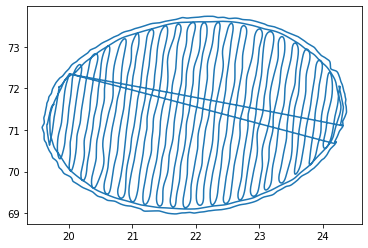

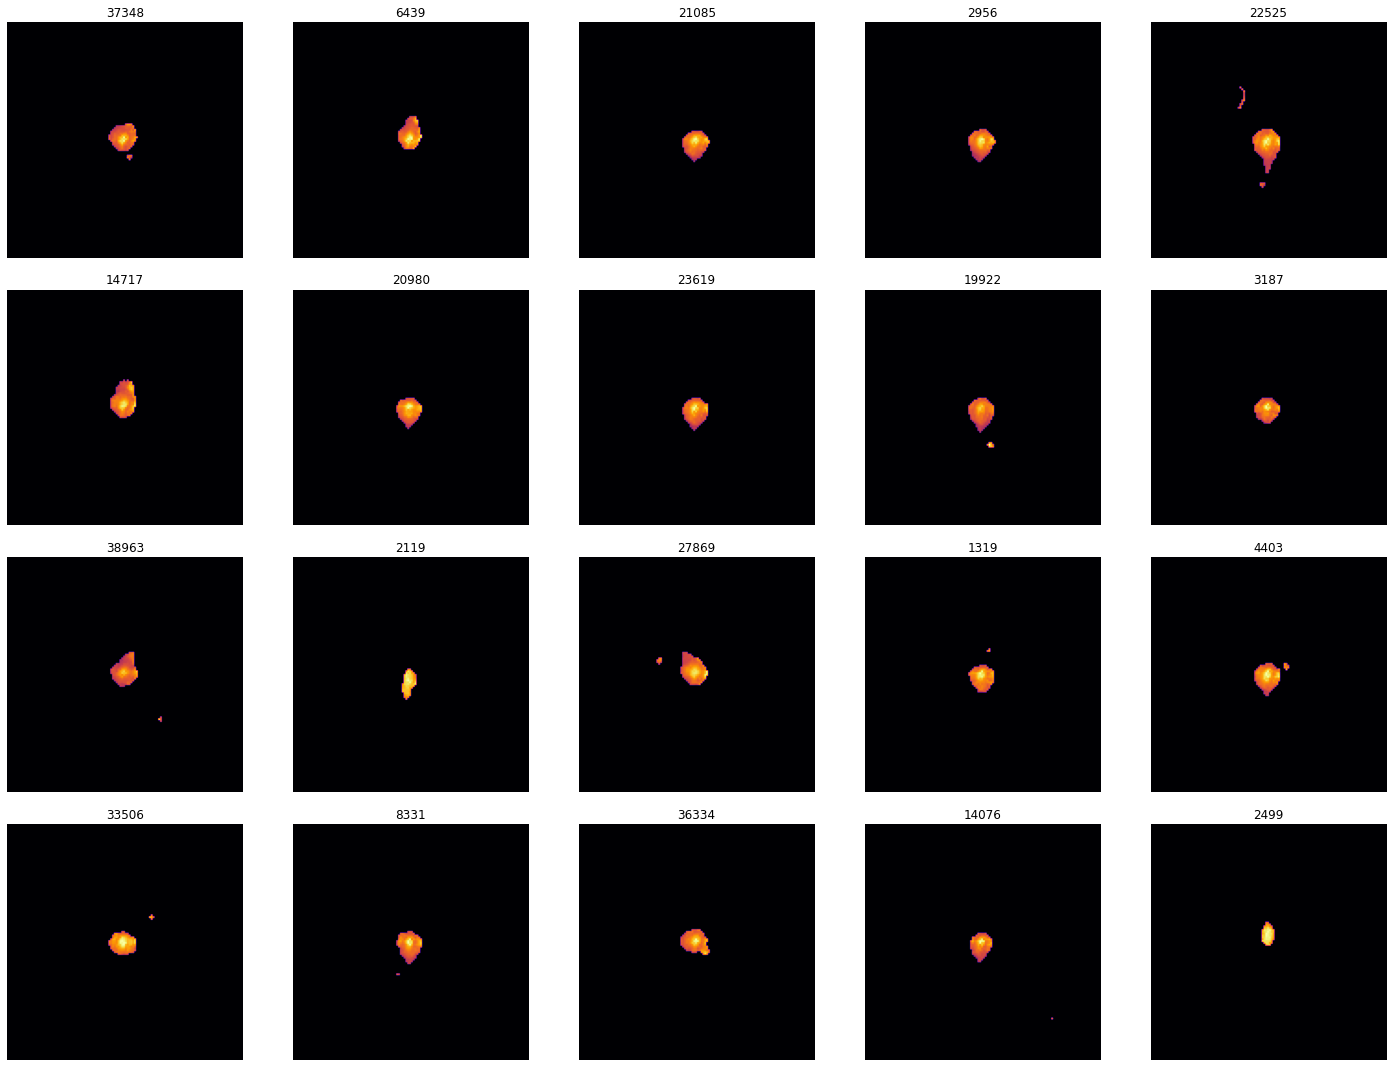


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# L184, L219: focus 0
data_storage = {}
positional_data = {}
layers = ['L184', 'L219']
for layer_num in range(len(layers)):
  print(layers[layer_num])
  os.chdir(data_path+layers[layer_num])

  matfiles = [dir for dir in os.listdir() if '.mat' in dir and '200' not in dir]
  print()
  matfiles



  f = h5py.File(matfiles[1],'r')

  # all the variables in the mat file
  print(list(f))


  x_true_pos = f.get('x_true_pos')
  y_true_pos = f.get('y_true_pos')


  x_true_pos = np.array(x_true_pos)[0]
  y_true_pos = np.array(y_true_pos)[0]

  plt.plot(x_true_pos, y_true_pos)

  plt.show()

  # get image from cam1aligned
  data = f.get('temperatureimgs')
  data = np.array(data)
  # store into a dictionary storage and positional dictionary
  data_storage[layers[layer_num]] = data
  positional_data[layers[layer_num]] = [x_true_pos, y_true_pos]

  block_num = 1
  idx_range = np.random.randint(0, len(data), 20)
  show_images(idx_range, data)

  plt.show()
  print()
  print('-'*300)
# Cleaner MP layers: L257, L219,L184, L146, L128
# Messy MP layers: L412(Top surface), L386, L330, L311(large plume), L291, L102
# multiply by 50 microns for layer number to get the focus height
# 3mm interval
# -12, -8, -4, 0, 4, 8, 12



In [ ]:
data_storage.keys()

dict_keys(['L184', 'L219'])

In [ ]:
img_list = []
for key, val in data_storage.items():
  for img in val:
    img_list.append(min_max_norm(img))
img_list = np.array(img_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


## Cropping

In [ ]:
from skimage.measure import regionprops, label
from statistics import mean

In [ ]:
# let's make 32 by 32
# print(max(w_list), max(h_list))

In [ ]:
total_data = []
for img in img_list:
  label_img = label(img>0)
  regions = regionprops(label_img)
  areas = [props.area for props in regions]
  for props in regions:
    if props.area == max(areas):
      # note I should restrict the size of smallest meltpool
      yc, xc = props.centroid
      # plt.imshow(img[int(yc)-16:int(yc)+16,int(xc)-16:int(xc)+16])
      cropped_img = img[int(yc)-16:int(yc)+16,int(xc)-16:int(xc)+16]
      total_data.append(cropped_img)
      break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


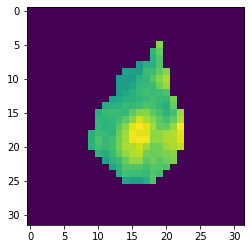

In [ ]:
plt.imshow(total_data[1000], cmap='inferno')

In [ ]:
total_data = np.array(total_data)

In [ ]:
n_sample = total_data.shape[0]
support = np.arange(n_sample)
idx_val = pd.Series(support).sample(frac=0.3).values
idx_train = support[~np.isin(support, idx_val)]

In [ ]:
print(idx_val.shape, idx_train.shape)

(22998,) (53661,)


In [ ]:
total_cropped_training_data = total_data[idx_train]
total_cropped_validation_data = total_data[idx_val]

# Training

In [ ]:
# Define sampling with reparameterization trick
def sample_z(args):
  mu, sigma = args
  batch     = K.shape(mu)[0]
  dim       = K.int_shape(mu)[1]
  eps       = K.random_normal(shape=(batch, dim))
  return mu + K.exp(sigma / 2) * eps

In [ ]:
# Define loss
def kl_reconstruction_loss(true, pred):
  beta = 4
  # Reconstruction loss
  reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height
  # KL divergence loss
  kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
  kl_loss = K.sum(kl_loss, axis=-1)
  kl_loss *= -0.5
  kl_loss *= beta
  # Total loss = 50% rec + 50% KL divergence loss
  return K.mean(reconstruction_loss + kl_loss)


In [ ]:
# Data & model configuration
img_width, img_height = 32, 32
batch_size = 128
no_epochs = 100
latent_dim = 3
num_channels = 1
input_shape = (32, 32, 1)

In [ ]:
# Define encoder's structure
i       = Input(shape=input_shape, name='encoder_input')
cx      = Conv2D(filters=8, kernel_size=3, strides=2, padding='same', activation='relu')(i)
cx      = BatchNormalization()(cx)
cx      = Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu')(cx)
cx      = BatchNormalization()(cx)
x       = Flatten()(cx)
x       = Dense(20, activation='relu')(x)
x       = BatchNormalization()(x)
mu      = Dense(latent_dim, name='latent_mu')(x)
sigma   = Dense(latent_dim, name='latent_sigma')(x)

# Get Conv2D shape for Conv2DTranspose operation in decoder
conv_shape = K.int_shape(cx)

In [ ]:
# Use reparameterization trick to ensure correct gradient
z       = Lambda(sample_z, output_shape=(latent_dim, ), name='z')([mu, sigma])

In [ ]:
# Instantiate encoder
encoder = Model(i, [mu, sigma, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 16, 16, 8)    80          encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_37 (BatchNo (None, 16, 16, 8)    32          conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 8, 8, 16)     1168        batch_normalization_37[0][0]     
____________________________________________________________________________________________

In [ ]:
# =================
# Decoder
# =================
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
# Definition
d_i   = Input(shape=(latent_dim, ), name='decoder_input')
x     = Dense(conv_shape[1] * conv_shape[2] * conv_shape[3], activation='relu')(d_i)
x     = BatchNormalization()(x)
x     = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)
cx    = Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same', activation='relu')(x)
cx    = BatchNormalization()(cx)
cx    = Conv2DTranspose(filters=8, kernel_size=3, strides=2, padding='same',  activation='relu')(cx)
cx    = BatchNormalization()(cx)
o     = Conv2DTranspose(filters=num_channels, kernel_size=3, activation='sigmoid', padding='same', name='decoder_output')(cx)

In [ ]:
# Instantiate decoder
decoder = Model(d_i, o, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 3)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              4096      
_________________________________________________________________
batch_normalization_40 (Batc (None, 1024)              4096      
_________________________________________________________________
reshape_7 (Reshape)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 16, 16, 16)        2320      
_________________________________________________________________
batch_normalization_41 (Batc (None, 16, 16, 16)        64        
_________________________________________________________________
conv2d_transpose_14 (Conv2DT (None, 32, 32, 8)         1160

In [ ]:
# Instantiate VAE
vae_outputs = decoder(encoder(i)[2])
vae         = Model(i, vae_outputs, name='vae')
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 32, 32, 1)         0         
_________________________________________________________________
encoder (Model)              [(None, 3), (None, 3), (N 22050     
_________________________________________________________________
decoder (Model)              (None, 32, 32, 1)         11841     
Total params: 33,891
Trainable params: 31,707
Non-trainable params: 2,184
_________________________________________________________________


In [ ]:
# Compile VAE
vae.compile(optimizer='Nadam', loss=kl_reconstruction_loss)

In [ ]:
vae.fit(total_cropped_training_data.reshape(-1, 32, 32, 1),
                total_cropped_training_data.reshape(-1, 32, 32, 1),
                validation_data=[total_cropped_validation_data.reshape(-1, 32, 32, 1), 
                total_cropped_validation_data.reshape(-1, 32, 32, 1)],
                epochs=8,
                batch_size=32)

Train on 53661 samples, validate on 22998 samples
Epoch 1/8
53661/53661 [==============================] - 41s 771us/step - loss: 164.6216 - val_loss: 144.9884
Epoch 2/8
53661/53661 [==============================] - 36s 674us/step - loss: 144.8344 - val_loss: 143.4798
Epoch 3/8
53661/53661 [==============================] - 36s 664us/step - loss: 144.2216 - val_loss: 142.8787
Epoch 4/8
53661/53661 [==============================] - 36s 664us/step - loss: 143.8658 - val_loss: 143.3490
Epoch 5/8
53661/53661 [==============================] - 36s 673us/step - loss: 143.7509 - val_loss: 143.1609
Epoch 6/8
53661/53661 [==============================] - 37s 690us/step - loss: 143.5716 - val_loss: 143.6733
Epoch 7/8
53661/53661 [==============================] - 37s 696us/step - loss: 143.3967 - val_loss: 142.9055
Epoch 8/8
53661/53661 [==============================] - 37s 690us/step - loss: 143.3494 - val_loss: 142.1465


In [ ]:
# num_channels=1
# img_width = 32
# img_height = 32
# latent_dim = 3
# def viz_decoded(encoder, decoder, nc1, nc2, limit=2):
#   num_samples = 20
#   figure = np.zeros((img_width * num_samples, img_height * num_samples, num_channels))
#   grid_x = np.linspace(-2.0, 2.0, num_samples)
#   grid_y = np.linspace(-2.0, 2.0, num_samples)[::-1]
#   for i, yi in enumerate(grid_y):
#       for j, xi in enumerate(grid_x):
#         ls = np.zeros(latent_dim)
#         ls[nc1]+=xi
#         ls[nc2]+=yi
#         z_sample = np.array([ls])
#         x_decoded = decoder.predict(z_sample)
#         digit = x_decoded[0].reshape(img_width, img_height, 1)
#         figure[i * img_width: (i + 1) * img_width,
#                 j * img_height: (j + 1) * img_height] = digit
#   plt.figure(figsize=(30, 30))
#   start_range = img_width // 2
#   end_range = num_samples * img_width + start_range + 1
#   pixel_range = np.arange(start_range, end_range, img_width)
#   sample_range_x = np.round(grid_x, 1)
#   sample_range_y = np.round(grid_y, 1)
#   plt.xticks(pixel_range, sample_range_x)
#   plt.yticks(pixel_range, sample_range_y)
#   plt.xlabel('z - dim {}'.format(nc1))
#   plt.ylabel('z - dim {}'.format(nc2))
#   # matplotlib.pyplot.imshow() needs a 2D array, or a 3D array with the third dimension being of shape 3 or 4!
#   # So reshape if necessary
#   fig_shape = np.shape(figure)
#   if fig_shape[2] == 1:
#     figure = figure.reshape((fig_shape[0], fig_shape[1]))
#   # Show image
#   plt.imshow(figure, cmap='inferno')
#   plt.show()

https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html#beta-vae

# Viz

In [ ]:
from keras.models import load_model
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Spring Term/Variational_Autoencoder')
os.getcwd()
!ls

 Anomalies_Classification.ipynb		        Metadata
'Anomalies_classifier(models)'		        pidgey
'Build2_Anomalies_Classification(f=-4).ipynb'  'rfBuild2_f=-4.h5'
'Build2_Anomalies_Classification(f=+4).ipynb'  'rfBuild2_f=+4.h5'
'Build2_f=-4_KMeans.h5'			       'svcBuild2_f=-4.h5'
'Build2_f=+4_KMeans.h5'			       'svcBuild2_f=+4.h5'
 Build_2.ipynb				        temp.csv
 Build2_KMeans.h5			        trial_unreflected_path_.png
 Build2OverlayVAE.ipynb			       'Type2_f=+4_Build2_Categories'
 Build_3.ipynb				       'Type2_label_Build2(f=-4)'
 Decoder_Build2.h5			       'Type2_label_Build2(f=+4)'
 Encoder_Build2.h5			        VAE_Attempt_1.ipynb
'(f=+4).ipynb'				        VAE_Attempt_2.ipynb
 KMeans.h5				        vae_decoder.h5
'knnBuild2_f=-4.h5'			        vae_encoder.h5
'knnBuild2_f=+4.h5'			        VAE_Framework_on_Build2.ipynb
 Label.ipynb				        vae.h5
 Labelled_Images			        VAE_on_Build2.ipynb


In [ ]:
decoder = load_model('vae_decoder.h5')
encoder = load_model('vae_encoder.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
res = encoder.predict(total_data.reshape(-1, 32, 32, 1))
c1= res[2][:, 0]
c2= res[2][:, 1]
c3= res[2][:, 2]

(-3.0, 3.0)

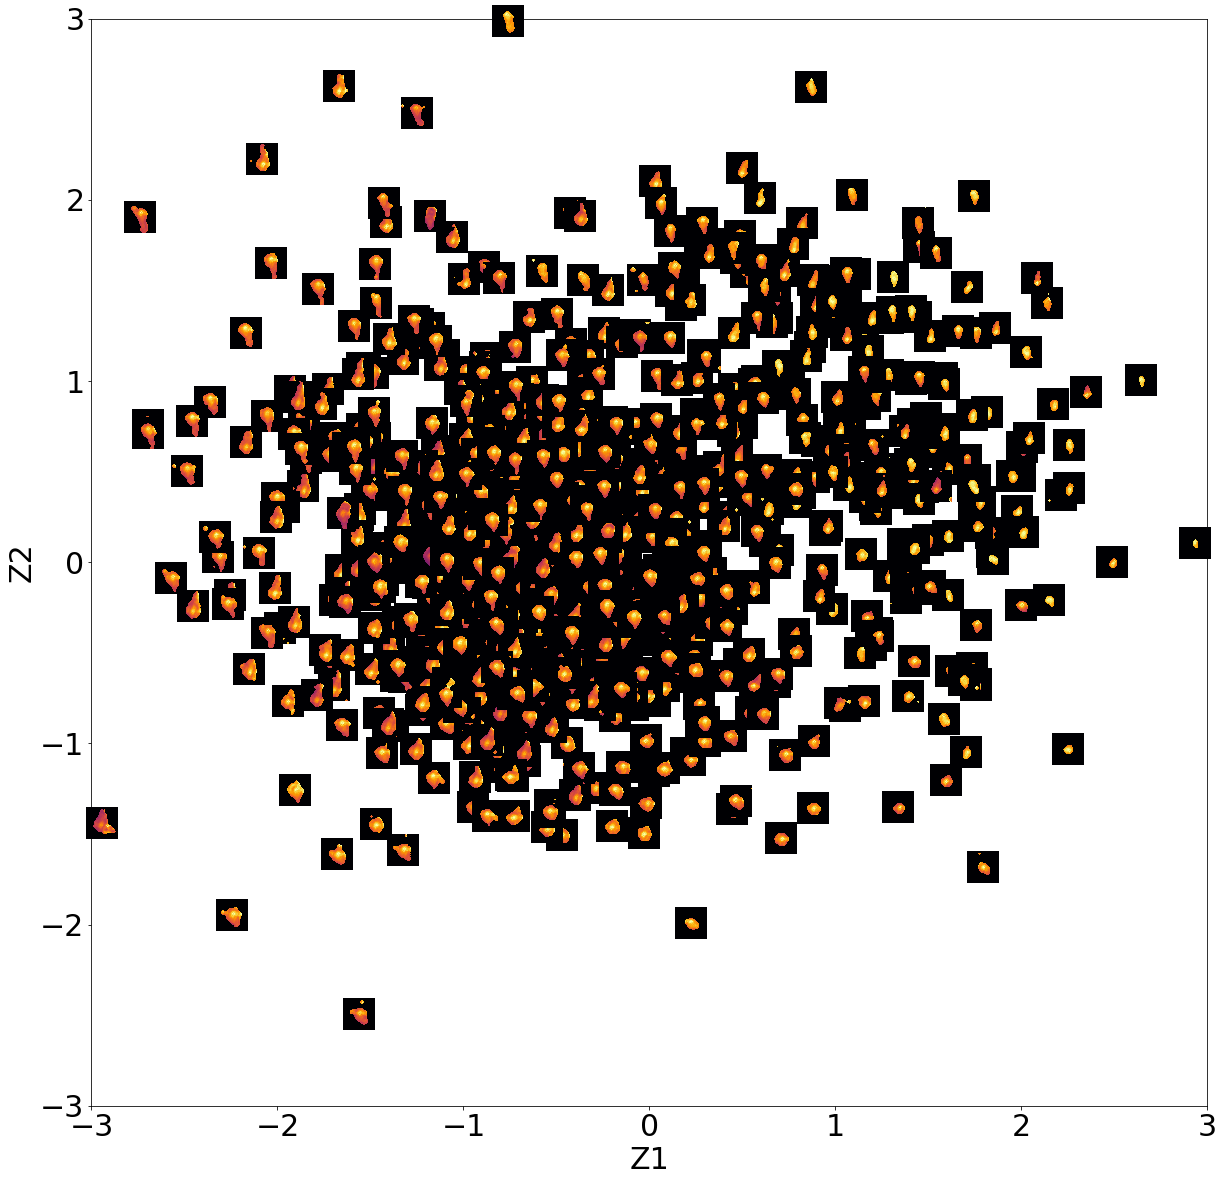

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
temp = c1[:5000]
temp2 = c2[:5000]
for ix in range(0, len(temp), 5):
  img = total_data[ix]
  im = OffsetImage(img, cmap='inferno')
  ab = AnnotationBbox(im, (temp[ix], temp2[ix]), frameon=False)
  ax.add_artist(ab)


plt.xlabel('Z1')
plt.ylabel('Z2')
plt.xlim(-3, 3)   
plt.ylim(-3, 3)   

(-3.0, 3.0)

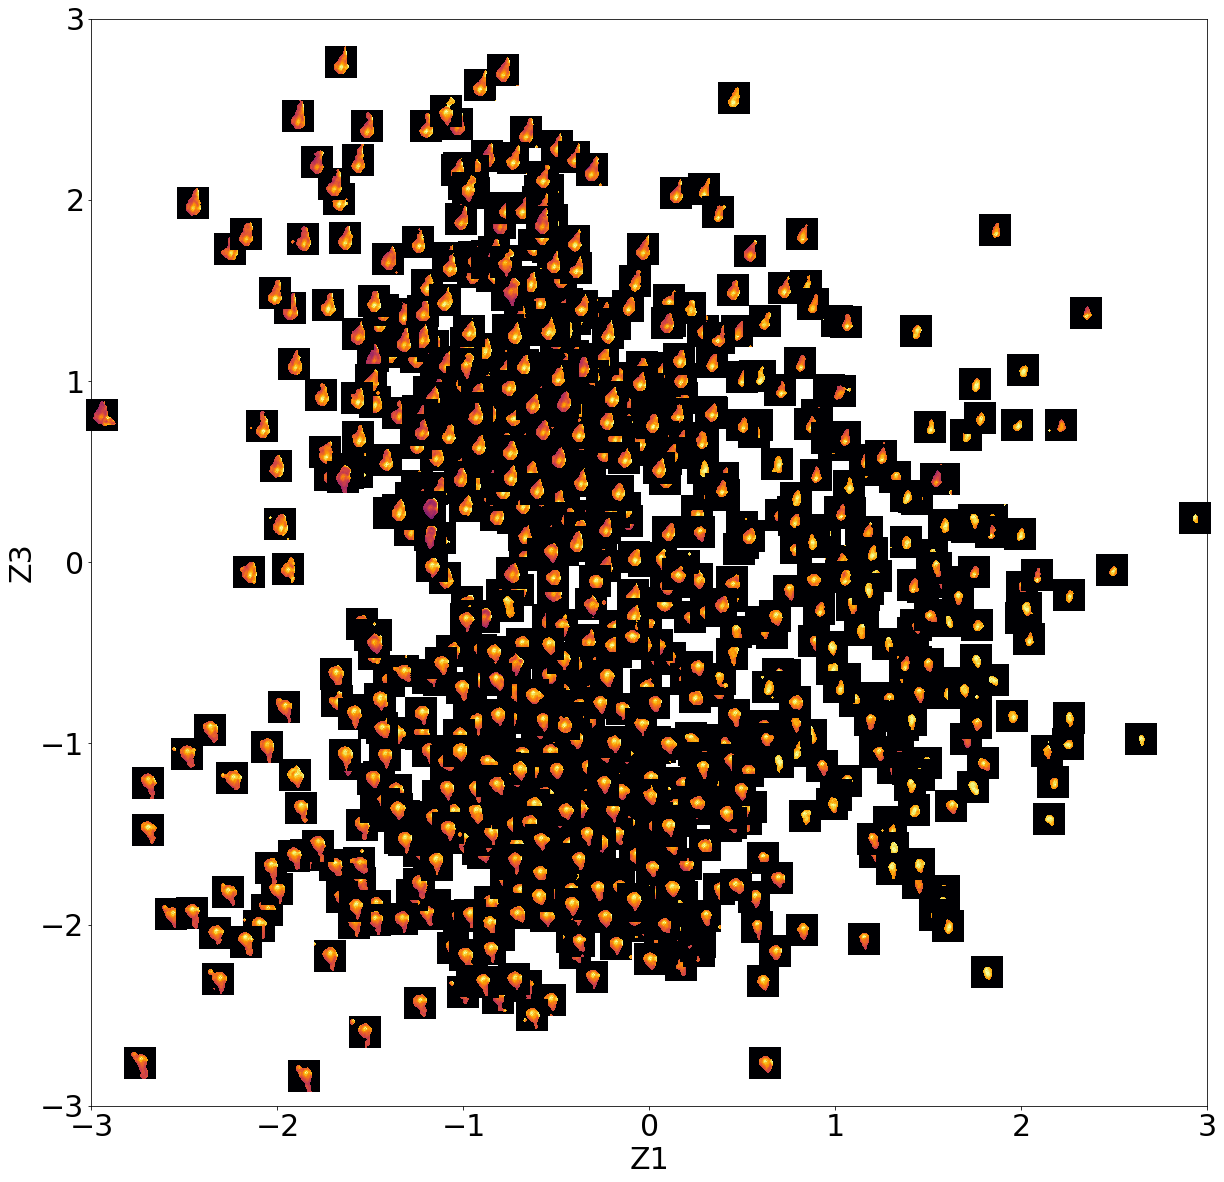

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
temp = c1[:5000]
temp2 = c3[:5000]
for ix in range(0, len(temp), 5):
  img = total_data[ix]
  im = OffsetImage(img, cmap='inferno')
  ab = AnnotationBbox(im, (temp[ix], temp2[ix]), frameon=False)
  ax.add_artist(ab)

plt.xlabel('Z1')
plt.ylabel('Z3')
plt.xlim(-3, 3)   
plt.ylim(-3, 3)   

# Generated MP Images

In [ ]:
num_channels=1
img_width = 32
img_height = 32
latent_dim = 3
def viz_decoded(encoder, decoder, nc1, nc2, z, limit=2):
  num_samples = 20
  figure = np.zeros((img_width * num_samples, img_height * num_samples, num_channels))
  grid_x = np.linspace(-limit, limit, num_samples)
  grid_y = np.linspace(-limit, limit, num_samples)[::-1]

  # pop out the dimensions we are varying and retain the one we are not
  ld = [0, 1, 2]
  ld.remove(nc1)
  ld.remove(nc2)
  for i, yi in enumerate(grid_y):
      for j, xi in enumerate(grid_x):
        ls = np.zeros(latent_dim)
        ls[nc1]+=xi
        ls[nc2]+=yi
        ls[ld[0]]+=z
        z_sample = np.array([ls])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(img_width, img_height, 1)
        figure[i * img_width: (i + 1) * img_width,
                j * img_height: (j + 1) * img_height] = digit
  plt.figure(figsize=(30, 30))
  start_range = img_width // 2
  end_range = num_samples * img_width + start_range + 1
  pixel_range = np.arange(start_range, end_range, img_width)
  sample_range_x = np.round(grid_x, 1)
  sample_range_y = np.round(grid_y, 1)
  plt.xticks(pixel_range, sample_range_x)
  plt.yticks(pixel_range, sample_range_y)
  plt.xlabel('z - dim {}'.format(nc1+1))
  plt.ylabel('z - dim {}'.format(nc2+1))
  # matplotlib.pyplot.imshow() needs a 2D array, or a 3D array with the third dimension being of shape 3 or 4!
  # So reshape if necessary
  fig_shape = np.shape(figure)
  if fig_shape[2] == 1:
    figure = figure.reshape((fig_shape[0], fig_shape[1]))
  # Show image
  plt.imshow(figure, cmap='inferno')
  plt.show()

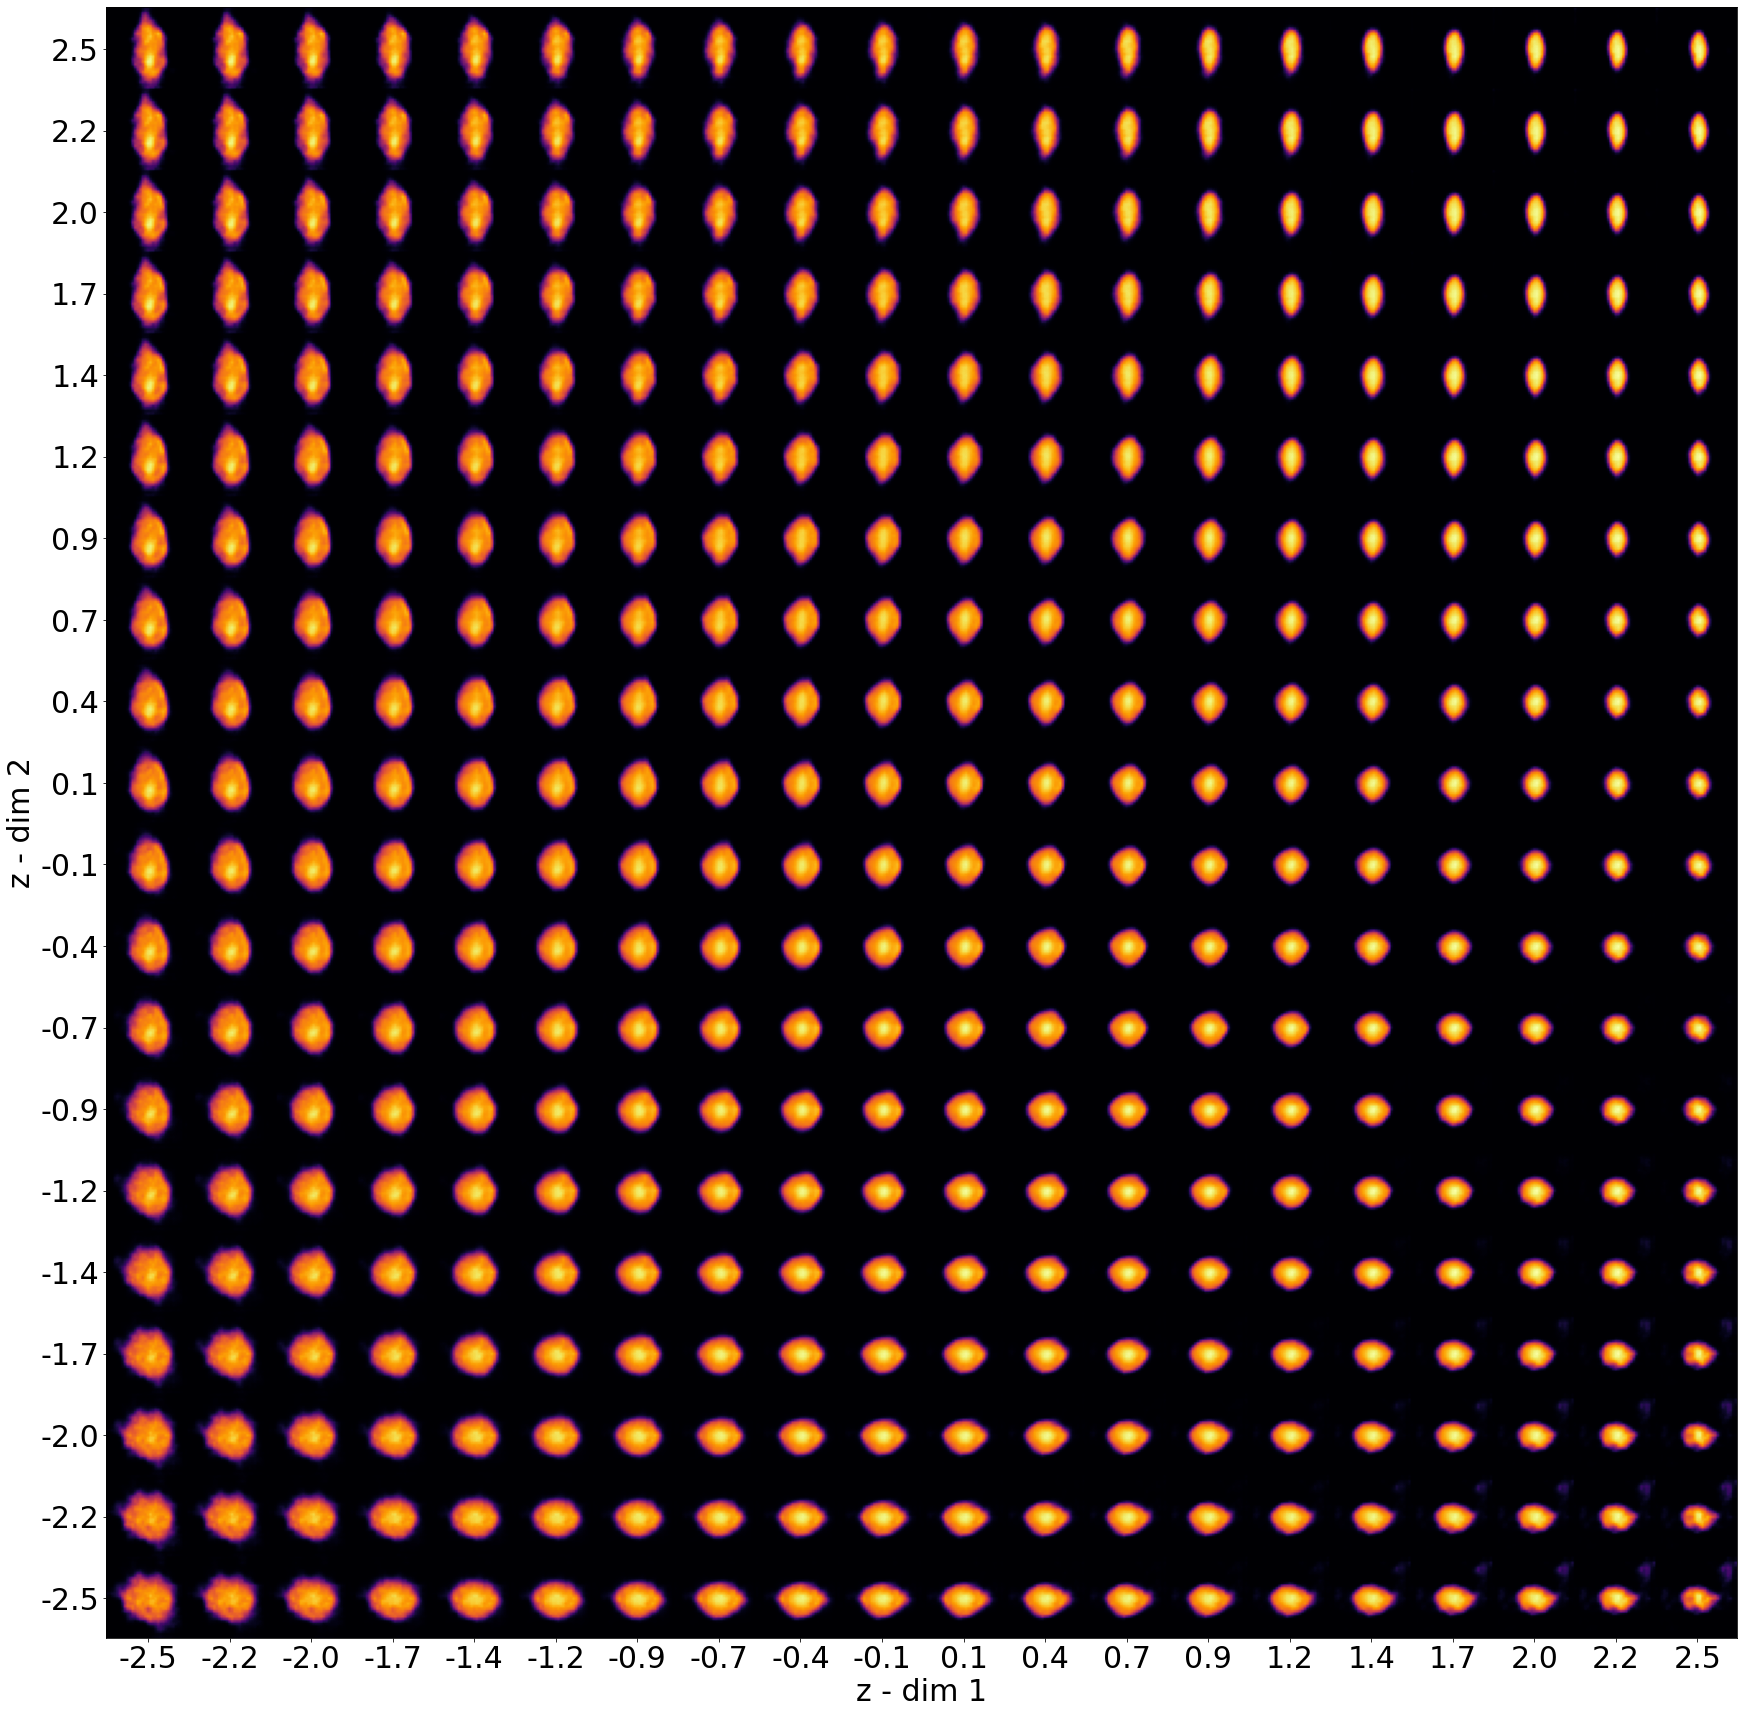

In [ ]:
plt.rcParams.update({'font.size':30})
viz_decoded(_, decoder, 0, 1, 0, 2.5)
plt.show()
# z0: size
# z1: pulled and squashed in horizontal/vertical direction

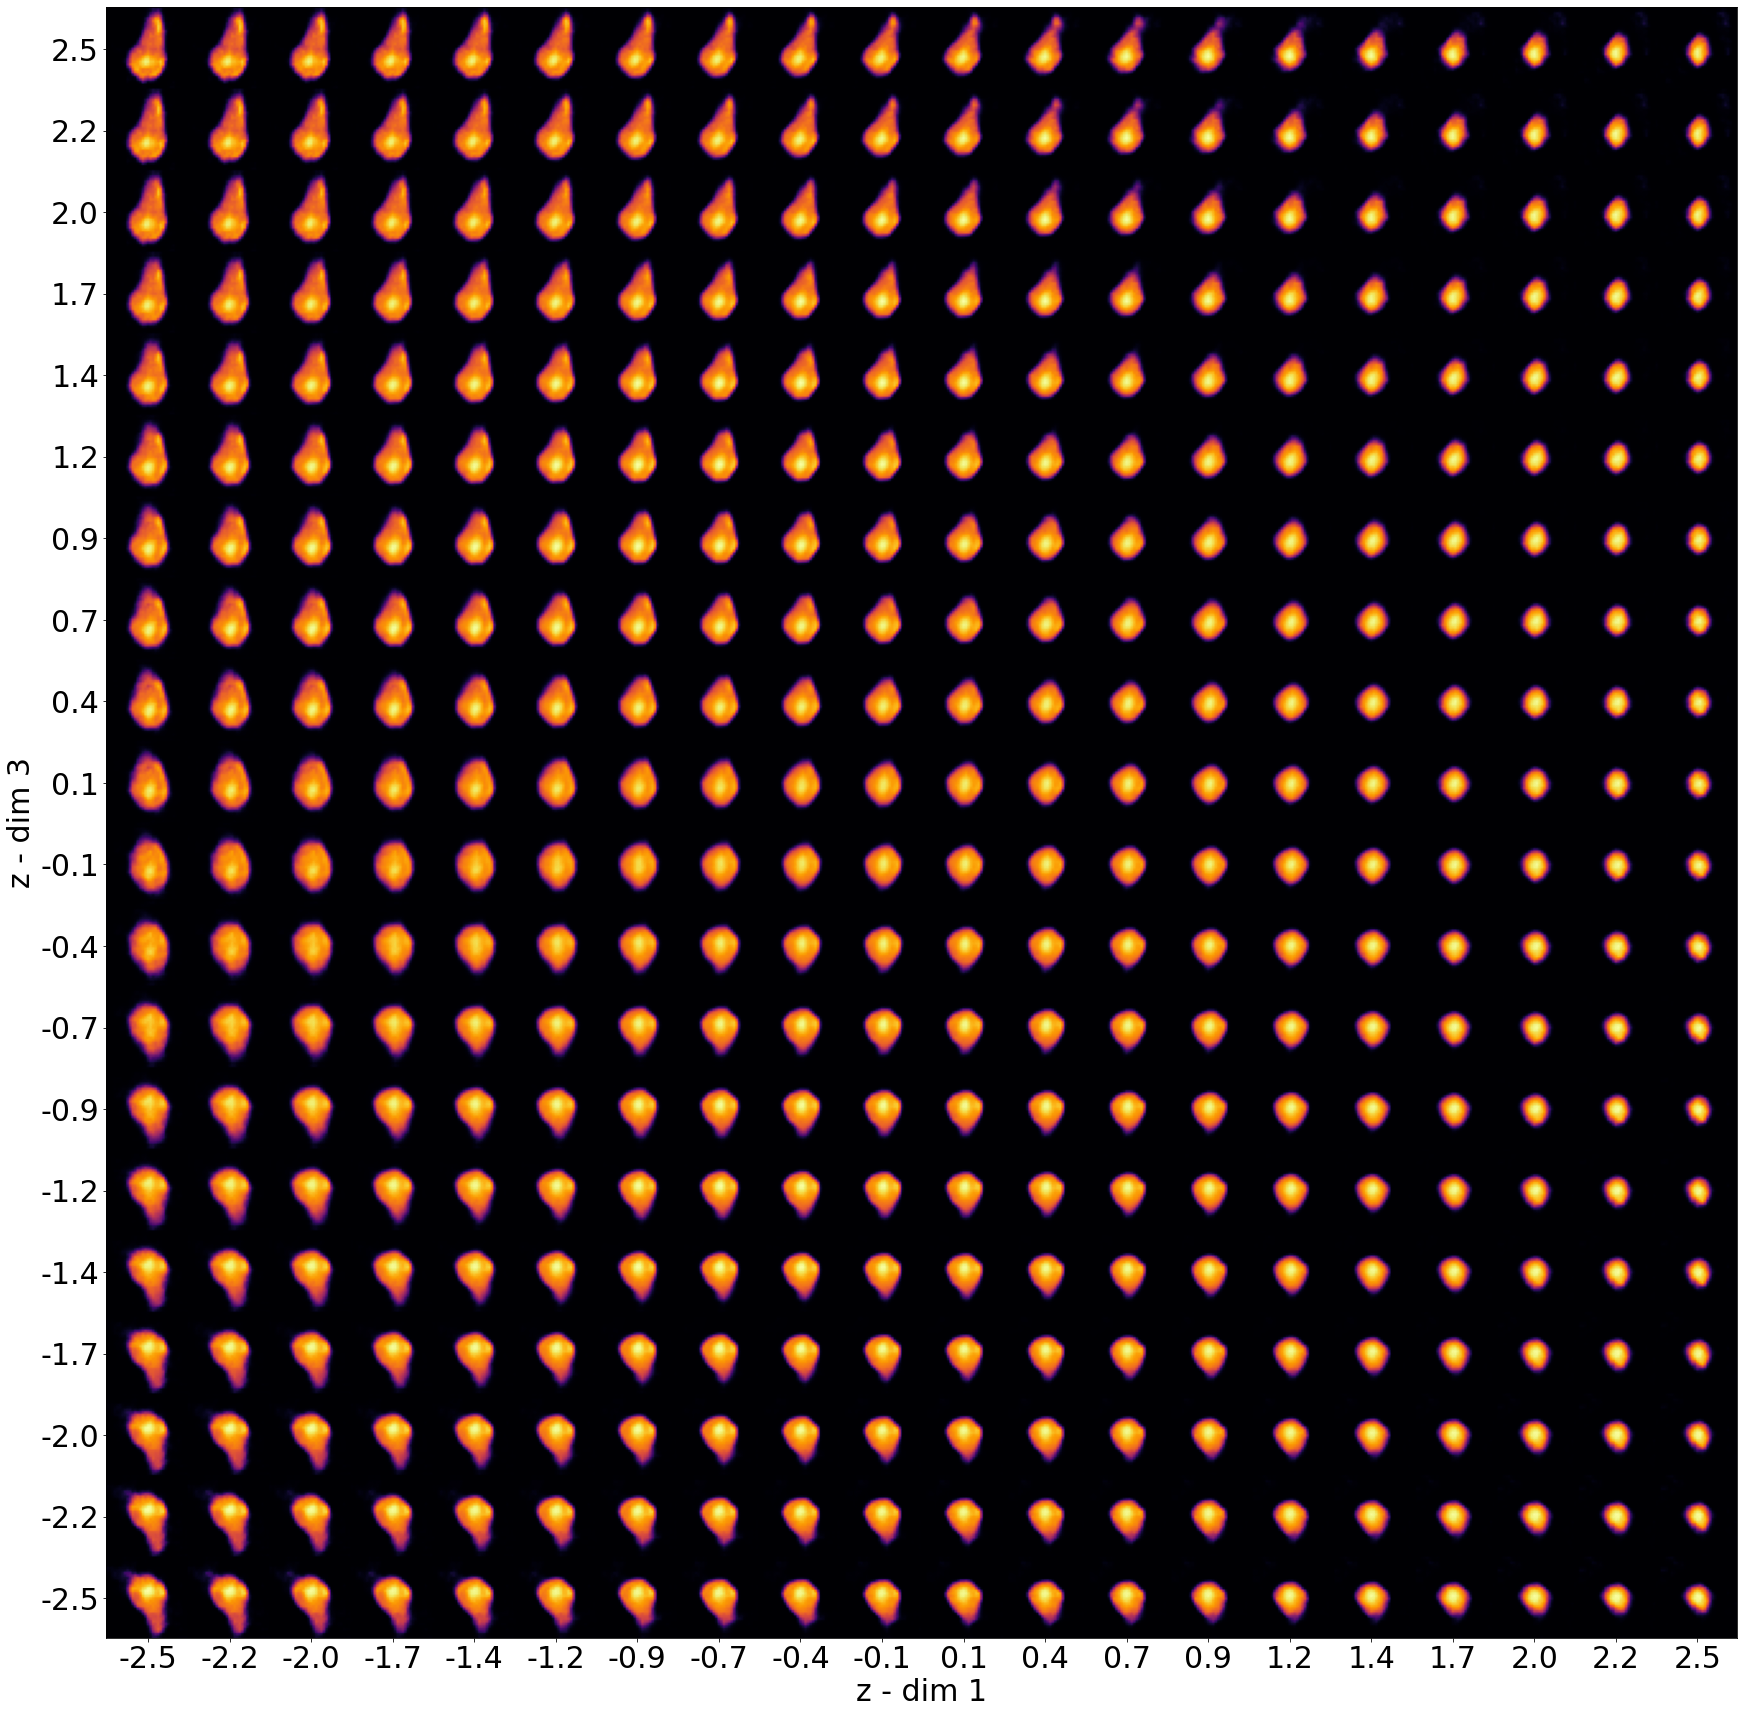

In [ ]:
viz_decoded(_, decoder, 0, 2, 0, 2.5)
# z2: direction
# z0: size

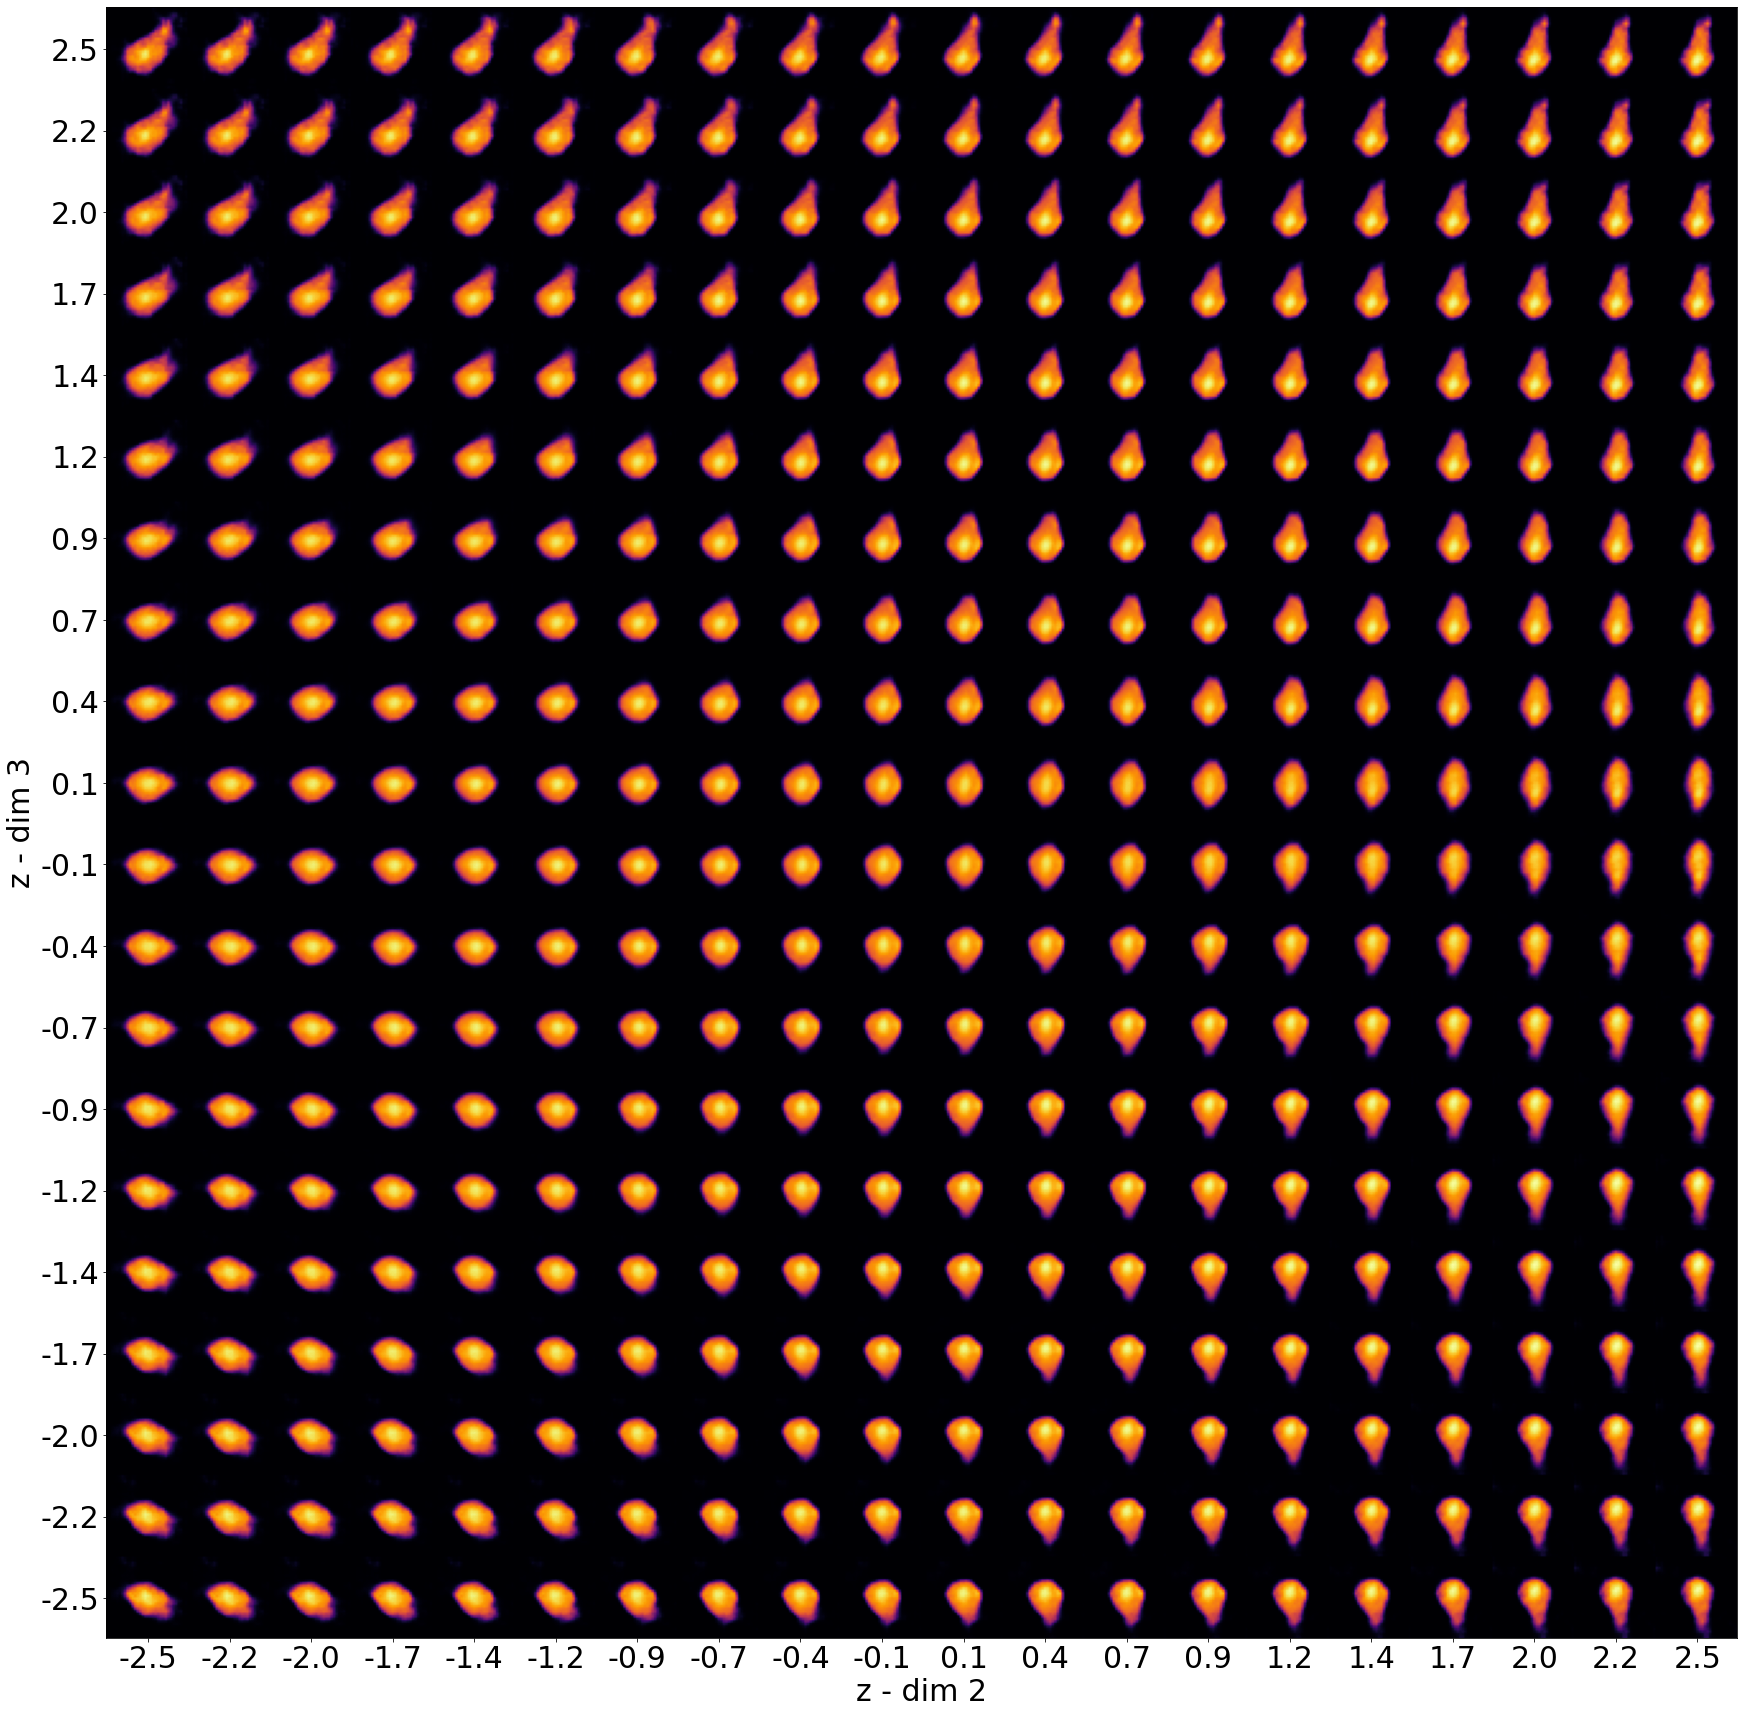

In [ ]:
viz_decoded(_, decoder, 1, 2, 0, 2.5)
# Again
# z1: squashed and pulled
# z2: direction

In [ ]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 16, 16, 8)    80          encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 16, 16, 8)    32          conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 8, 8, 16)     1168        batch_normalization_19[0][0]     
____________________________________________________________________________________________

In [ ]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 3)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              4096      
_________________________________________________________________
batch_normalization_22 (Batc (None, 1024)              4096      
_________________________________________________________________
reshape_4 (Reshape)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 16, 16, 16)        2320      
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 16)        64        
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 32, 32, 8)         1160

Remark: So z0, z1 and z2 captures the size, eccentricity and direcion of the MP respectively.

Let's try to play with these parameters by generating MP images and see if they align with our expectations:
1. Long tail and potentially tail seperation.
requires large melt pool (negative z0), squashed and pulled in opposite directions (large z1 magnitude) and clear tailing direction(large z2 magnitude).

2. Plume (large blob with no preferred direction/ less clear direction)
requires large melt pool (negative z0), less obvious squashing and pulling (small z1) and vague direction (small z2)


In [ ]:
# long tail
# Generate large MP
# Focus on large z1 (positive matches negative did not)
# Clear direcction z2 (both large positive z2 and negative z2 match with our expectation)

# Plume
# Generate large MP
# Focus on small z1 (positive matches negative did not)
# Vague direcction z2 (z2~0.7)
viz_decoded(_, decoder, 1, 2, -1.5, 2.5)



# Real data

In [ ]:
# How about the real data??
res = encoder.predict(total_data.reshape(-1, 32, 32, 1))
c0= res[2][:, 0]
c1= res[2][:, 1]
c2= res[2][:, 2]


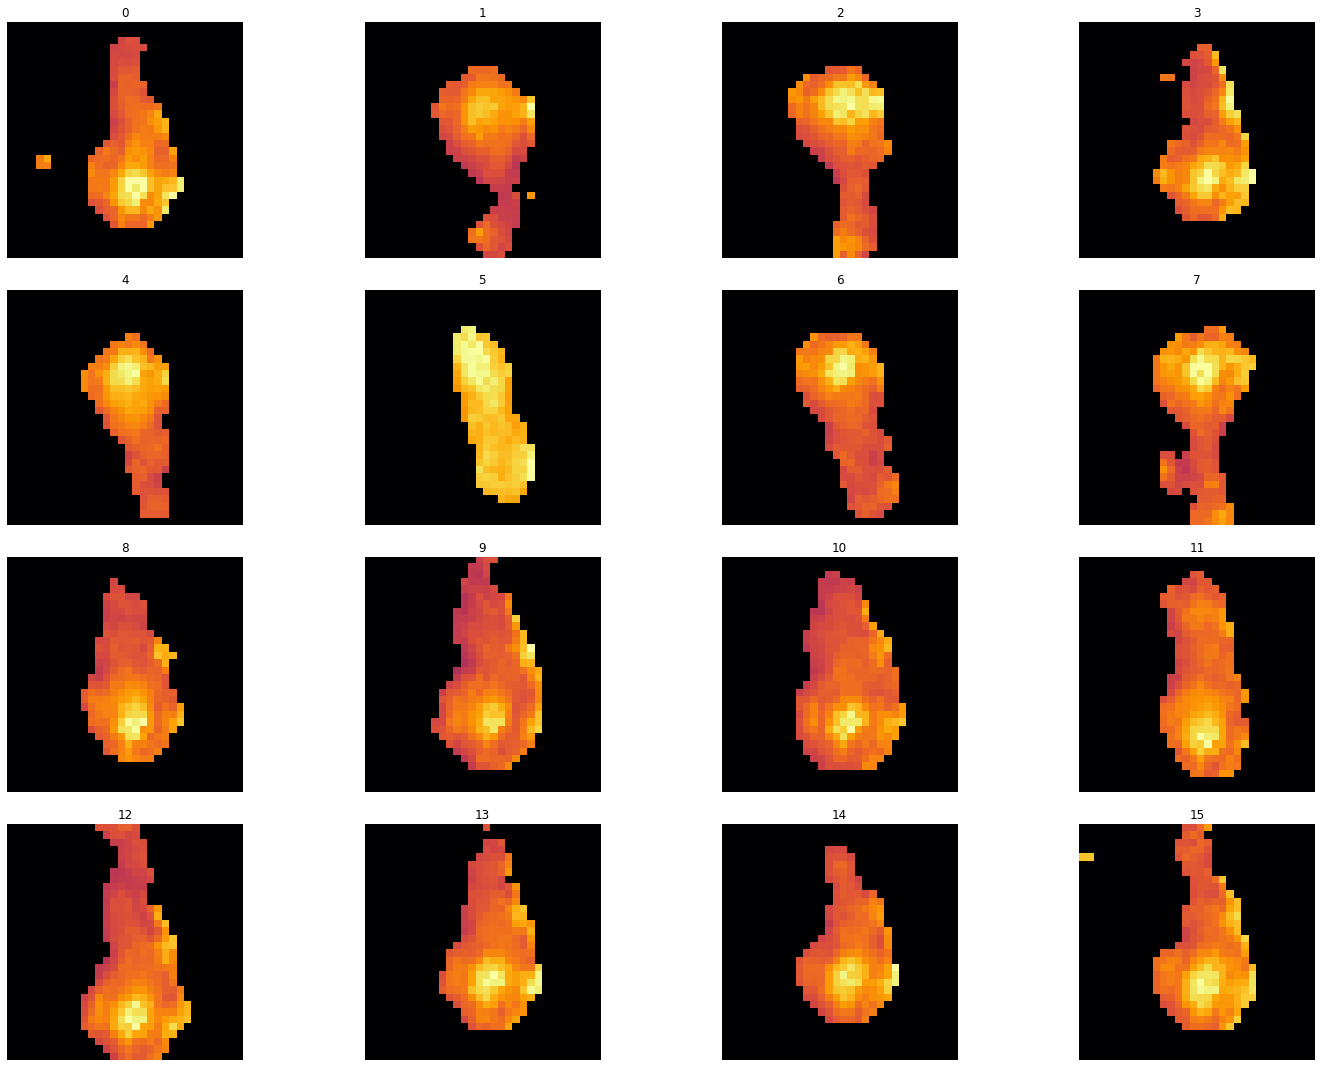

In [ ]:
# tail separation (or abt to separate tail)
# large MP (negative c0)
# Squashed and pulled (large c1) (positive matches negative did not)
# Clear direction c2 (both large positive c2 and negative c2 match with our expectation)

conditional_images = total_data[((c0<-1.5)*(c1>2.5)*(abs(c2)>0.4))]
show_images(np.arange(0, len(conditional_images)), conditional_images)

plt.show()

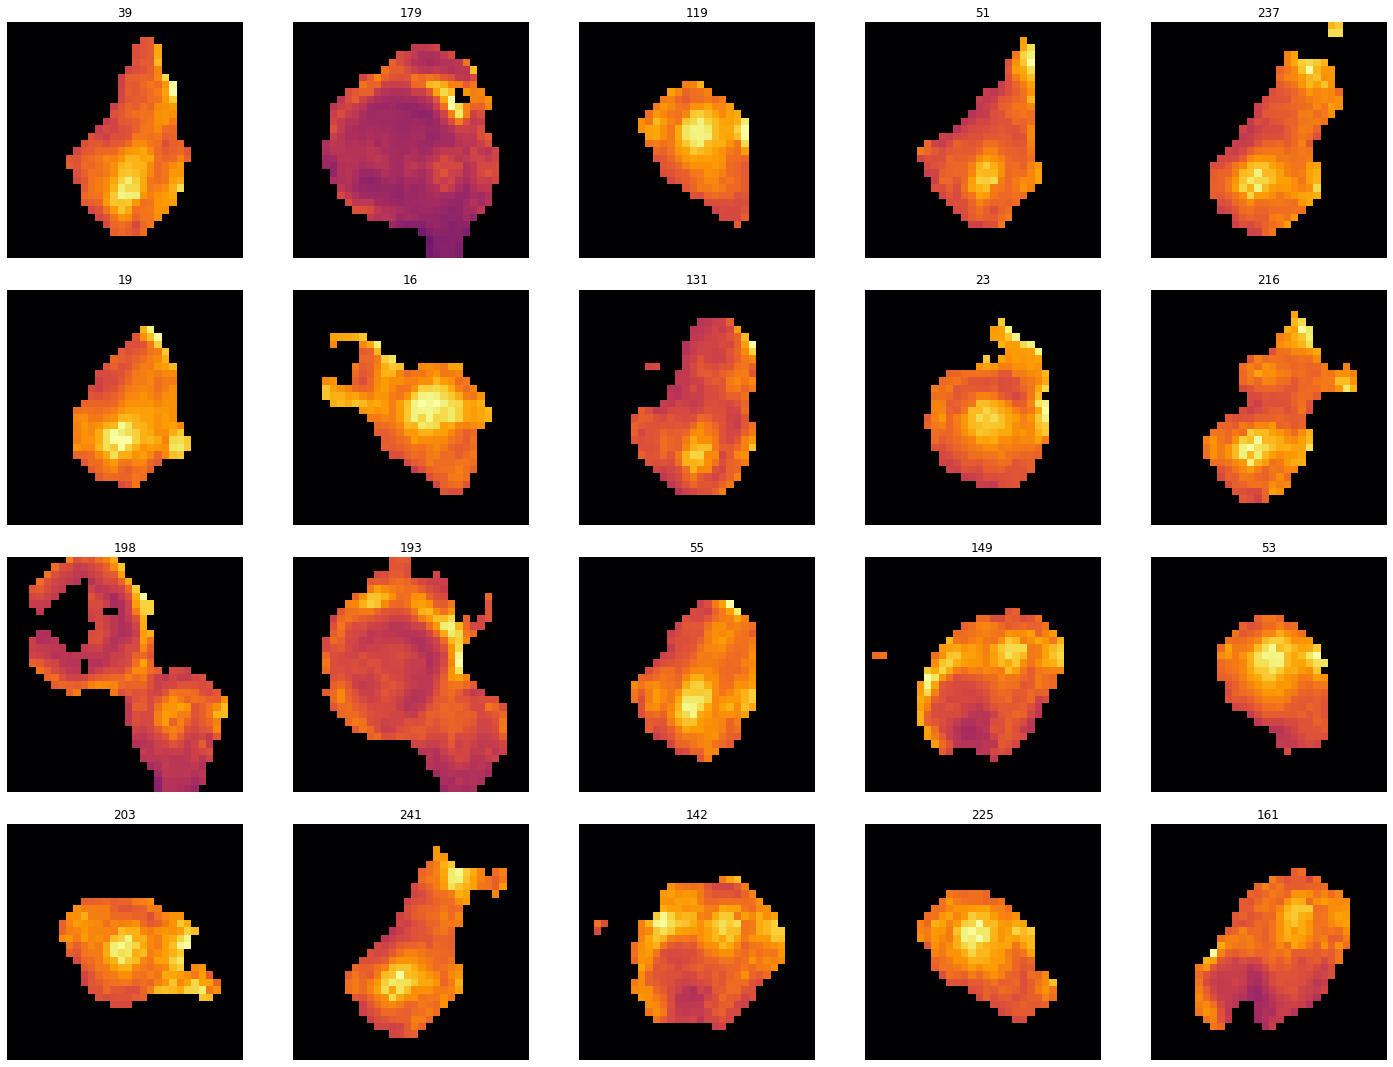

In [ ]:
# plume

condition = ((c0<-1.5)*(c1<-0.9)*np.logical_or(c2<-1.4, c2>0.9))
np.random.randint(0, len(condition), 20)

conditional_images = total_data[condition]

show_images(np.random.randint(0, len(conditional_images), 20), conditional_images)

plt.show()


# Checkpoint
In this notebook, we deploy the decoder and encoder of the vae trained.
For visualisation, we alter the component of the latent vector of the decoder and visualised the individual effects of the component has onn the MP.

Then, we generate a grid of images for tail separation and plume to check if they agree with our intuition and understanding of the latent variables.

Finally, we utilise the understanding developed on the real melt pool data to determine the threshold values.

# Suggestions
For these visualisations, I'm only limiting myself to z0<-1.5 (large melt pools). It'll be useful if we can extend this to other sizes as well. Also, need a way to standardize the process of determining the thresholds. 

The next step is to train supervised models to help determine appropriate thresholdding values automatically.

# Caveat
The vae was trained on build 3 data with zero focus height. The images are cropped to size of 32x32 coaxially based on the centroid of the melt pools. This means that for other focus height, 32x32 might not be a suitable size (especially for very large plume). It's probably ok to use this framework for feature extraction once our coaxial melt pool images can fit into the cropped size.

In [ ]:
encoder = load_model('vae_encoder.h5')

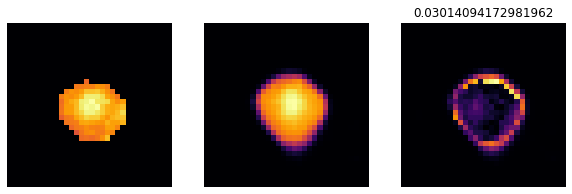

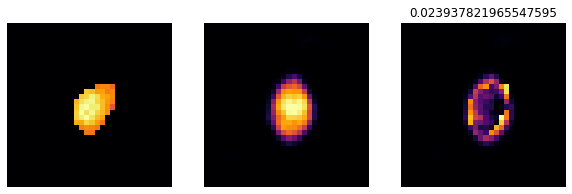

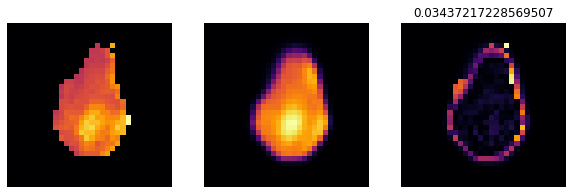

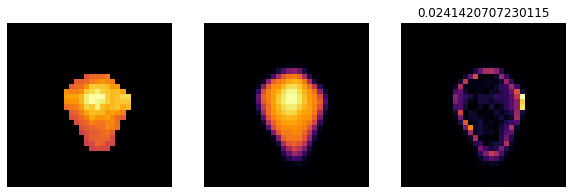

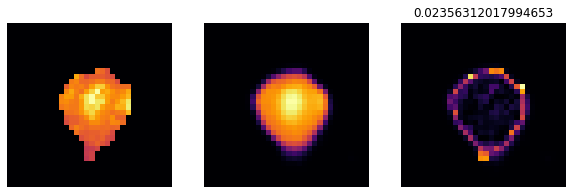

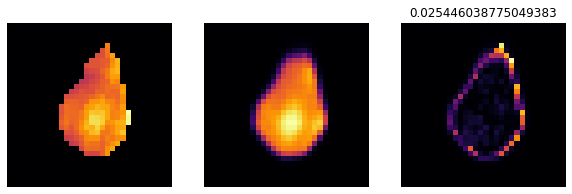

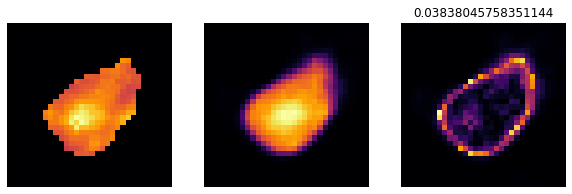

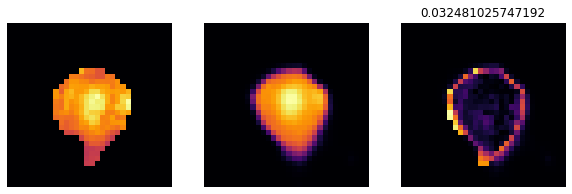

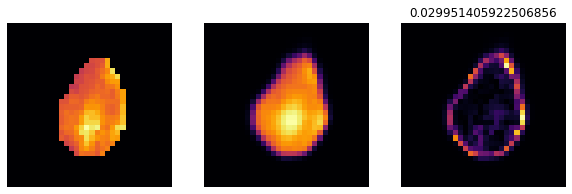

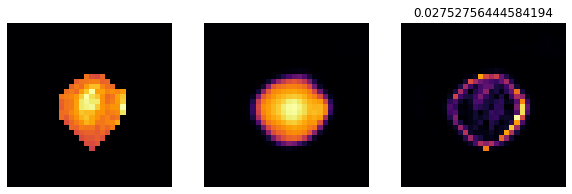

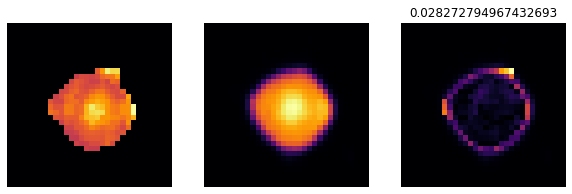

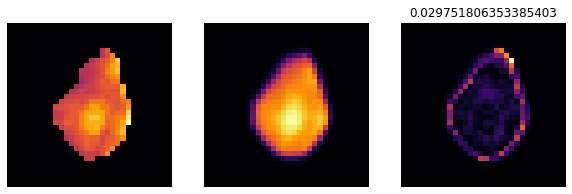

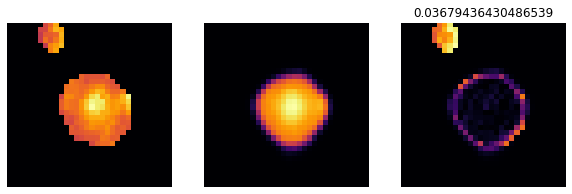

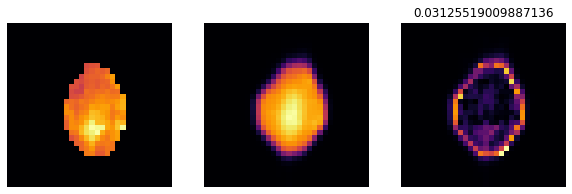

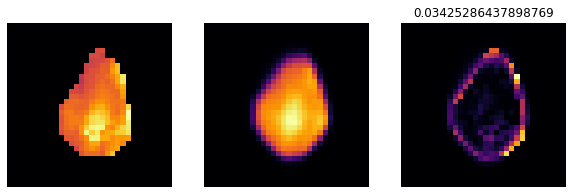

In [ ]:
idx_list = np.random.randint(0, len(total_cropped_validation_data), 15)
for i in idx_list:
  _, ax = plt.subplots(nrows=1, ncols = 3, figsize=(10, 5))
  img = total_cropped_validation_data[i]
  _, _, z = encoder.predict(img.reshape(1, 32, 32, 1))
  err = abs(img-decoder.predict(z).reshape(32, 32))
  ax[0].imshow(img, cmap='inferno')
  ax[1].imshow(decoder.predict(z).reshape(32, 32), cmap='inferno')
  ax[2].imshow(err, cmap='inferno')
  ax[2].set_title(err.mean())

  list(map(lambda x: x.set_axis_off(), ax))

# Save Model

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Spring Term/Variational_Autoencoder')
os.getcwd()
!ls

'Copy of InternalStructureAutoencoderBuild1r2.ipynb'
 VAE_Attempt_1.ipynb
 VAE_Attempt_2.ipynb
 Variational_Autoencoder.ipynb
